<a href="https://colab.research.google.com/github/douglascdsantos/unesp_estatistica_e_probabilidade/blob/main/aula01/tabela%20de%20frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

In [8]:
planilha = pd.read_excel('https://github.com/douglascdsantos/unesp_estatistica_e_probabilidade/blob/main/aula01/dados_Aula_01.xlsx?raw=true', index_col='Id')
planilha

,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler
Id,,,,,,,,
1,A,F,17,1.60,60.5,2,NAO,P
2,A,F,18,1.69,55.0,1,NAO,M
3,A,M,18,1.85,72.8,2,NAO,P
4,A,M,25,1.85,80.9,2,NAO,P
5,A,F,19,1.58,55.0,1,NAO,M
6,A,M,19,1.76,60.0,3,NAO,M
7,A,F,20,1.60,58.0,1,NAO,P
8,A,F,18,1.64,47.0,1,SIM,I
9,A,F,18,1.62,57.8,3,NAO,M


In [9]:
planilha.Toler.value_counts()

P    21
M    19
I    10
Name: Toler, dtype: int64

In [10]:
planilha.Toler.value_counts(normalize=True)*100

P    42.0
M    38.0
I    20.0
Name: Toler, dtype: float64

In [11]:
tabela = pd.DataFrame({'frequência': planilha.Toler.value_counts(),
                   'frequência relativa': planilha.Toler.value_counts(normalize=True)*100})

In [12]:
tabela

,frequência,frequência relativa
P,21,42.0
M,19,38.0
I,10,20.0


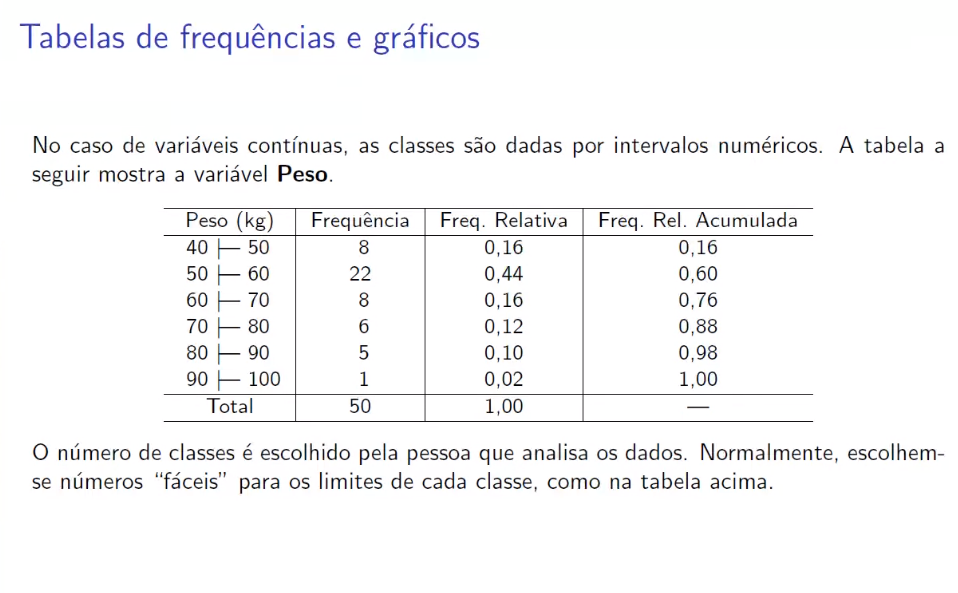

In [31]:
import seaborn as sns

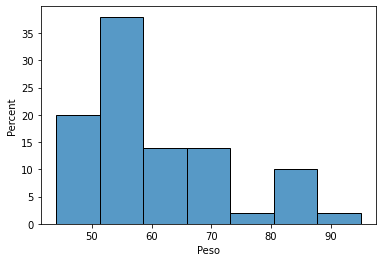

In [35]:
sns.histplot(
    data = planilha.Peso,
    stat = 'percent')

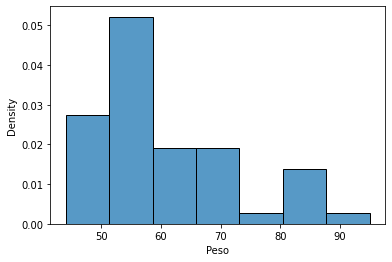

In [34]:
sns.histplot(
    data = planilha.Peso,
    stat = 'density')